### My Documenation for Machine Learning Models Analysis using Yellowbrick Visualizers and API

**Introduction to Yellowbrick**

Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it’s using Matplotlib.

The primary goal of Yellowbrick is to create a sensical API similar to Scikit-Learn.

It extends the scikit-learn API with a new core object: the Visualizer. Visualizers allow visual models to be fit and transformed as part of the scikit-learn pipeline process, providing visuals throughout the transformation of high-dimensional data.

Visualizers are the core objects in Yellowbrick. They are similar to transformers in Scikit-Learn. Visualizers can wrap a model estimator - similar to how the “ModelCV” (e.g. RidgeCV, LassoCV) methods work.


- full documentation link: https://www.scikit-yb.org/en/latest/



**Advantages**

Yellowbrick isn’t a replacement for other data visualization libraries but helps to achieve the following:


**Installation**

Yellowbrick can either be installed through pip or through conda distribution.

- pip install yellowbrick





** **

**Feature Visualization:**

Rank Features, Parallel Coordinates, Radial Visualization, PCA Projection, Manifold Visualization, Joint Plots.

**Classification Visualization:** 

Class Prediction Error, Classification Report, ROC/AUC Curves, Precision-Recall Curves, Confusion Matrices, Discrimination Threshold.

**Regression Visualization:**

Prediction Error Plot, Residuals Plot, Alpha Selection, Cook’s Distance


**Clustering Visualization:**

K-Elbow Plot, Silhouette Plot, Intercluster Distance Maps

**Model Selection Visualization:**

Validation Curve, Learning Curve, Feature Importances, Recursive Feature Elimination

**Target Visualization:**

Balanced Binning Reference, Class Balance, Feature Correlation

**Text Visualization:**

Term Frequency, t-SNE Corpus Visualization, Dispersion Plot, UMAP Corpus Visualization, PosTag Visualization



## Model Selection Process

- Selecting and/or engineering the smallest and most predictive feature set
- Choosing a set of algorithms from a model family
- Tuning the algorithm hyperparameters to optimize performance

# Installation

In [2]:
# pip install yellowbrick

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from yellowbrick.style import set_palette
set_palette('flatui')

# Loading Data

In [3]:
df = pd.read_csv('occupancy.csv')

In [4]:
df.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## Specifying the feature and target column

In [5]:
features = ['temperature', 'relative humidity', 'light', 'C02', 'humidity']

target = 'occupancy'

In [6]:
X = df[features]
y = df[target]

# Feature Analysis

### Using Yellowbrick Rank1D

A one-dimensional single-feature ranking algorithm is employed to create a one-dimensional ranking of features, such as through histogram analysis. 

The Shapiro-Wilk algorithm is used by default to evaluate the normality of the feature's distribution among instances. A barplot is then generated to display the relative ranks of each feature.

In [7]:
from yellowbrick.features import Rank1D    

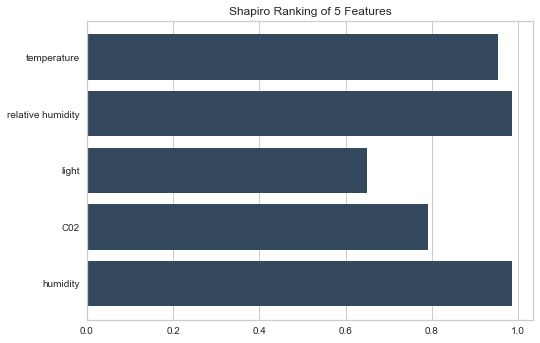

<Axes: title={'center': 'Shapiro Ranking of 5 Features'}>

In [8]:
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)     # Fitting the data to the visualizer
visualizer.transform(X)  # Transforming the data
visualizer.poof()   

### Using Yellowbrick Rank 2D

Using Rank2D for pairwise feature analysis to find strong correlations in the data.

● Understanding the relationships between features is essential in feature engineering.

● A heatmap can be used to visually represent pairwise relationships.

● The Pearson correlation coefficient helps identify strong correlations and potential collinearity.

● Covariance provides insights into the sequence of relationships between features.

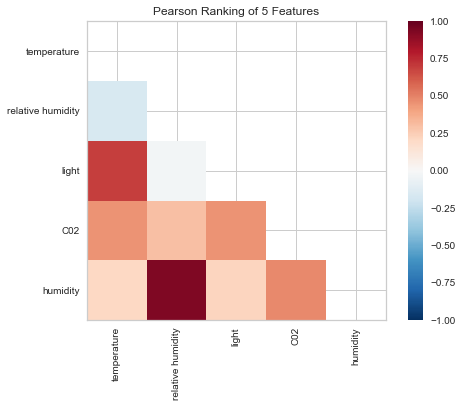

<Axes: title={'center': 'Pearson Ranking of 5 Features'}>

In [9]:
from yellowbrick.features import Rank2D 

visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
visualizer.poof()    

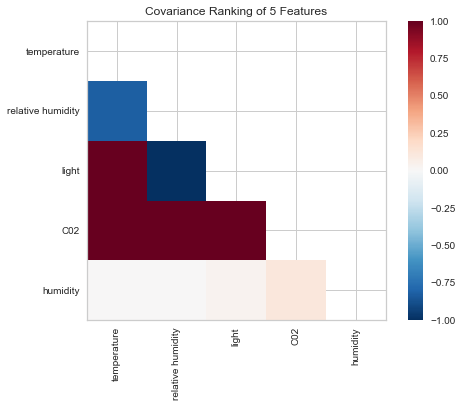

<Axes: title={'center': 'Covariance Ranking of 5 Features'}>

In [10]:
from yellowbrick.features import Rank2D 

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    

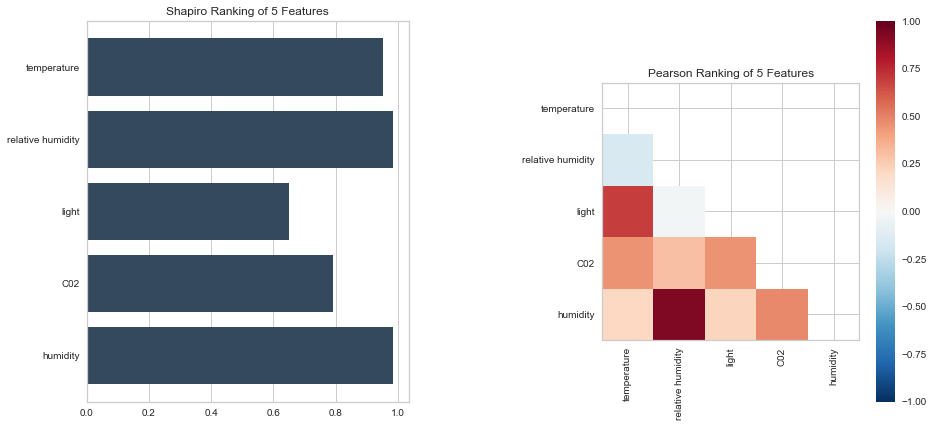

In [11]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d

fig, axes = plt.subplots(ncols=2, figsize=(15,7))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
# Adjust spacing between the plots
plt.subplots_adjust(wspace=0.6)
plt.show()

### RadViz

RadViz is an algorithm used for multivariate data visualization. It involves placing each feature dimension uniformly around the perimeter of a circle and subsequently plotting data points within the circle. 

This approach enables the visualization of multiple dimensions within a single circle, thereby expanding the dimensionality of the visualization significantly.

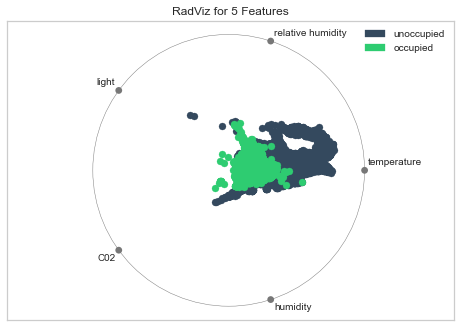

<Axes: title={'center': 'RadViz for 5 Features'}>

In [12]:
from yellowbrick.features import RadViz


# Specify the target classes
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = RadViz(classes=classes)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

### Parallel Coordinates

Parallel Coordinates is a valuable technique employed for detecting clusters of instances with similar classes and identifying features with high variance or distinct distributions. 

In this method, each feature is represented by a vertical axis, and data points are plotted as connected line segments across these axes.

Instances that exhibit clustering tendencies will appear closer together in the visualization, providing insights into the relationships between features and the presence of distinct groups or patterns.

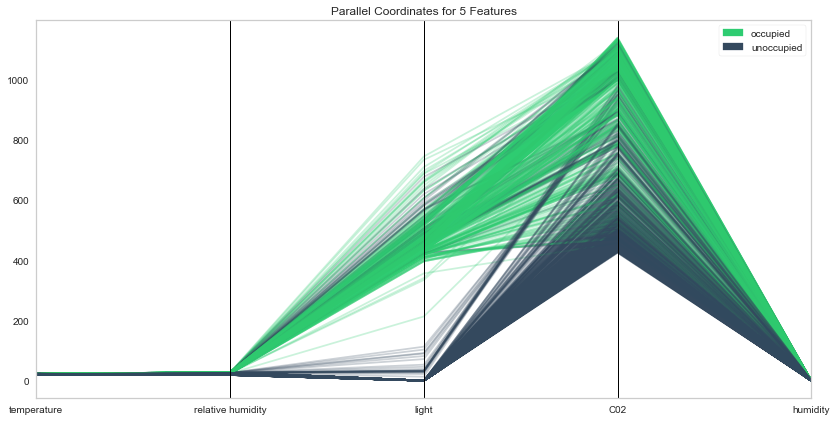

<Axes: title={'center': 'Parallel Coordinates for 5 Features'}>

In [13]:
from yellowbrick.features import ParallelCoordinates

# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    sample=0.1, size = (1000,500)
)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

### Parallel Coordinates Normalised

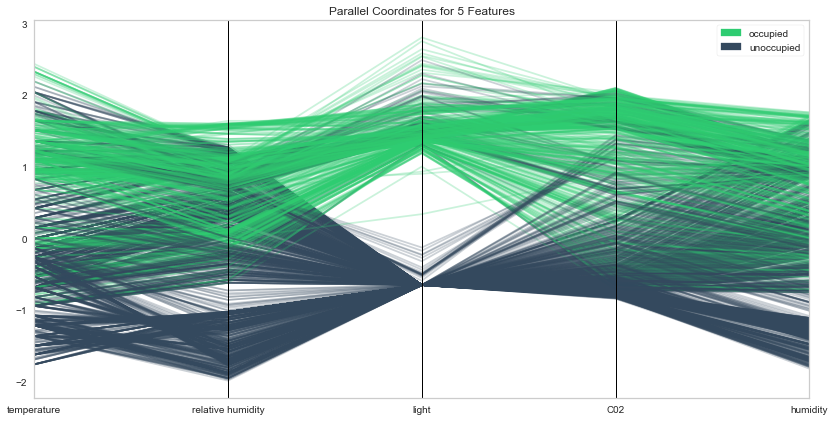

<Axes: title={'center': 'Parallel Coordinates for 5 Features'}>

In [14]:
from yellowbrick.features import ParallelCoordinates
features = features
classes = ['unoccupied', 'occupied']
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1, size = (1000,500)
)
visualizer.fit(X, y)     
visualizer.transform(X)   
visualizer.poof()

### Model Evaluation Visualizers

Feature Importance Plot is a visualizer that helps in selecting the minimum necessary features for building a valid model. It is based on the understanding that as the number of features in a model increases, the complexity of the model also increases. 

This can lead to issues like sparse data and errors due to variance.

The Feature Importance Plot ranks and plots the relative impact of features with respect to each other. By analyzing this plot, you can determine which features have a stronger influence on the model's performance compared to others. 

This can guide you in selecting the most relevant features and simplifying the model, ultimately improving its interpretability and reducing the risk of overfitting.

# Classifier Evaluation

Classification models aim to assign dependent variables into one or more predefined categories. The ***sklearn.metrics*** module in **scikit-learn** provides functions to evaluate the performance of classification models. 

These functions allow you to measure various aspects of classification performance, such as accuracy, precision, recall, F1 score, and area under the receiver operating characteristic curve (ROC AUC).

Some commonly used functions in sklearn.metrics for evaluating classification performance include:

- **accuracy_score:** Computes the accuracy of the classification model by comparing the predicted labels with the true labels.


- **precision_score:** Calculates the precision of the model, which measures the proportion of correctly predicted positive instances out of all instances predicted as positive.


- **recall_score:** Computes the recall of the model, which measures the proportion of correctly predicted positive instances out of all actual positive instances.


- **f1_score:** Computes the F1 score, which is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall.


- **roc_auc_score:** Calculates the area under the ROC curve, which is a performance metric that quantifies the model's ability to distinguish between positive and negative instances.

These functions help in assessing the performance of classification models and comparing different models based on their predictive accuracy and other metrics.

In [15]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ConfusionMatrix    

In [16]:
# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']


# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # you can set seed if you want

### Classification Report
The classification report visualizer displays the precision, recall, and F1 scores for the model. Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection

- **precision**

Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

- **recall**

Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”


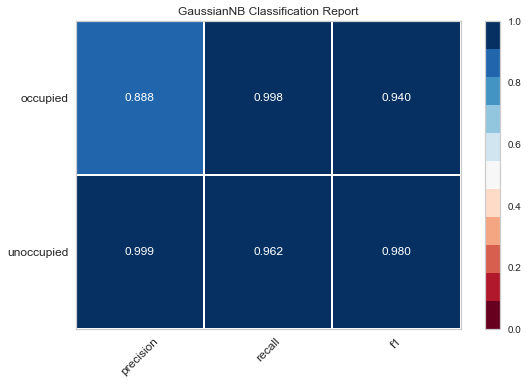

In [17]:
# Instantiate the classification model and visualizer 

bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, cmap=set_palette('flatui'))

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()   

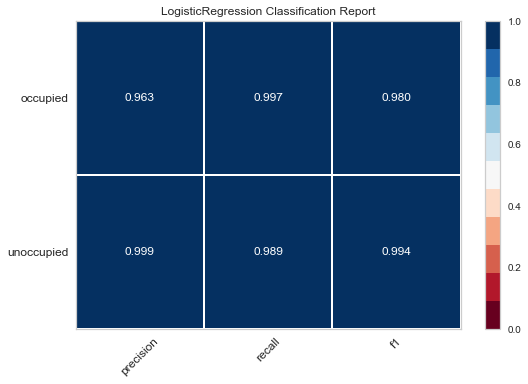

In [18]:
# Instantiate the classification model and visualizer 
bayes = LogisticRegression()
visualizer = ClassificationReport(bayes, classes=classes, cmap=set_palette('flatui'))

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()   

### Confusion Matrix
The ConfusionMatrix visualizer displays the accuracy score of the model, i.e., it shows how each of the test values predicted classes compare to their actual classes.

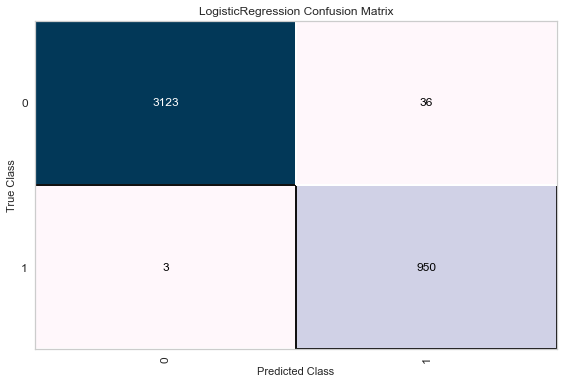

In [19]:
logReg = LogisticRegression()
visualizer = ConfusionMatrix(logReg, cmap='PuBu')

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 

g = visualizer.poof()     

### ROC, AUC

A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity.


The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.


This leads to another metric, area under the curve (AUC), which is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. 

However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.

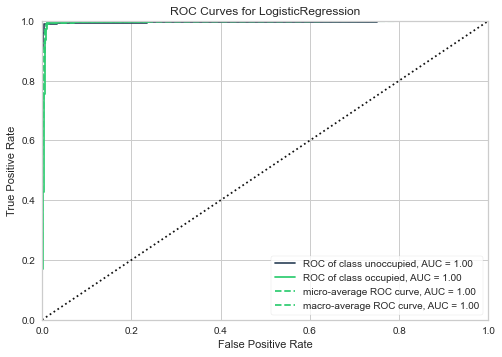

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
from yellowbrick.classifier import ROCAUC


# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=['unoccupied', 'occupied'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

### Precision-Recall Curves


The PrecisionRecallCurve shows the tradeoff between a classifier’s precision, a measure of result relevancy, and recall, a measure of completeness. 

For each class, precision is defined as the ratio of true positives to the sum of true and false positives, and recall is the ratio of true positives to the sum of true positives and false negatives.



- **average precision**

Average precision expresses the precision-recall curve in a single number, which represents the area under the curve. It is computed as the weighted average of precision achieved at each threshold, where the weights are the differences in recall from the previous thresholds.

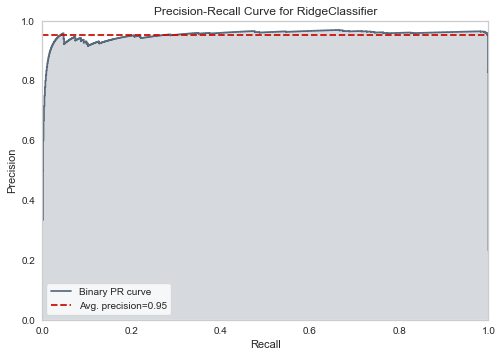

<Axes: title={'center': 'Precision-Recall Curve for RidgeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [21]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RidgeClassifier(random_state=0))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

**Precision-recall curves are one of the methods used to evaluate a classifier’s quality, particularly when classes are very imbalanced.**

### ClassBalance

Class balance chart that shows the support for each class in the fitted classification model.



In [ ]:
# Instantiate the classification model and visualizer 
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Finalize and render the visualizer

# Clustering Evaluation

## Elbow Method

The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for **K**. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

To demonstrate, in the following example the KElbowVisualizer fits the KMeans model for a range of 
**K** values from 4 to 11 on a sample two-dimensional dataset with 8 random clusters of points. When the model is fit with 8 clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

The KElbowVisualizer also displays the amount of time to train the clustering model per **K** as a dashed green line, but is can be hidden by setting timings=False. In the following example, we’ll use the calinski_harabasz score and hide the time to fit the model.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Silhouette Visualizer

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for **K** by comparing multiple visualizers.

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X, y = load_nfl()

# Specify the features to use for clustering
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = X.query('Tgt >= 20')[features]

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Intercluster Distance Maps

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. 

The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. 

Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 12 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans(6)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Regression Evaluation

In [22]:
#load the concrete dataset
df2 = pd.read_csv('concrete.csv')

df2.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [23]:
# Save feature names as a list and target variable as a string
features_reg = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_reg = 'strength'

# Get the X and y data from the DataFrame 
X_reg = df2[features_reg]
y_reg = df2[target_reg]

# Create the train and test data 
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2)

### Residuals Plot

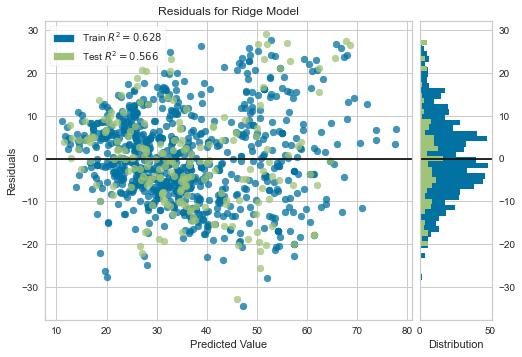

In [24]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer 
model = Ridge()
visualizer = ResidualsPlot(model) #,hist=False

visualizer.fit(X_reg_train, y_reg_train)  # Fit the training data to the visualizer
visualizer.score(X_reg_test, y_reg_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

 if the histogram is not desired, it can be turned off with the hist=False flag
 
 ** **


### Prediction Error Plot

The Prediction Error Visualiser visualizes prediction errors as a scatterplot of the predicted & actual values. 

We can then visualize the line of best fit & compare it to the 45º line.

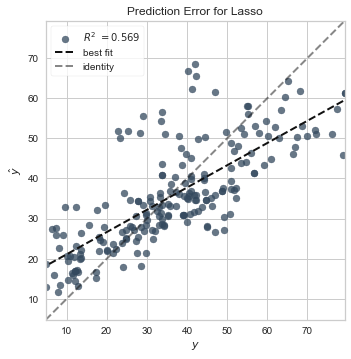

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_reg_train, y_reg_train)  # Fit the training data to the visualizer
visualizer.score(X_reg_test, y_reg_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Alpha Selection Visualizer

The AlphaSelection Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models. 

A higher value of alpha denotes a less complex model and vice versa, decreasing the error due to variance (overfit). 

However, alphas that are too high increase the error due to bias (underfit). 

Therefore, it is important to choose an optimal alpha such that the error is minimized in both directions.

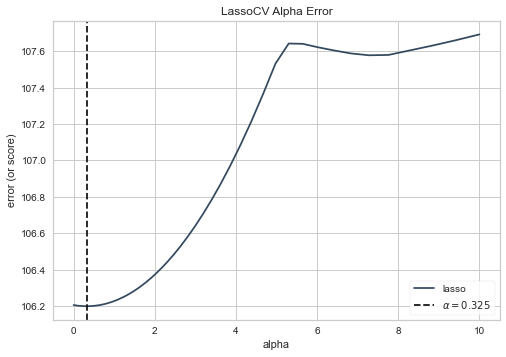

In [26]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_reg_train, y_reg_train)
g = visualizer.poof()

### Cook’s Distance

Cook’s Distance is a measure of an observation or instances’ influence on a linear regression. Instances with a large influence may be outliers, and datasets with a large number of highly influential points might not be suitable for linear regression without further processing such as outlier removal or imputation. 

The CooksDistance visualizer shows a stem plot of all instances by index and their associated distance score, along with a heuristic threshold to quickly show what percent of the dataset may be impacting OLS regression models.

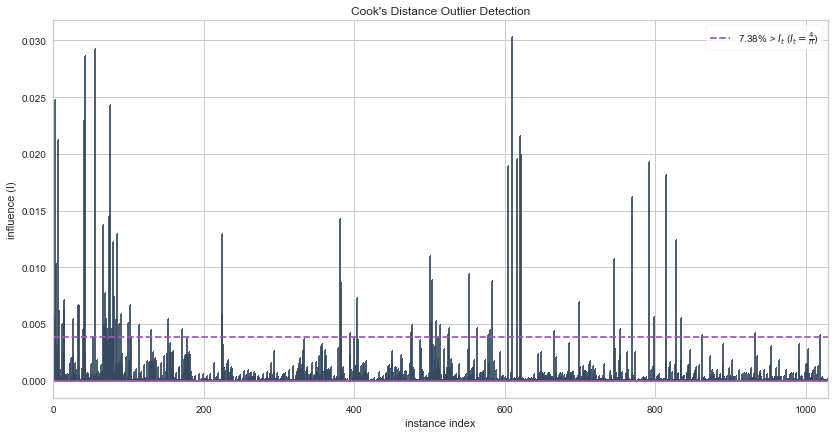

<Axes: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [27]:
from yellowbrick.regressor import CooksDistance

# Instantiate and fit the visualizer
visualizer = CooksDistance(size = (1000,500))
visualizer.fit(X_reg, y_reg)
visualizer.show()

# Text Modeling Visualizers

Yellowbrick provides the yellowbrick.text module for text-specific visualizers. 

The TextVisualizer class specifically deals with datasets that are corpora and not simple numeric arrays or DataFrames, providing utilities for analyzing word dispersion and distribution, showing document similarity, or simply wrapping some of the other standard visualizers with text-specific display properties.

We currently have five text-specific visualizations implemented:

- **Token Frequency Distribution:** plot the frequency of tokens in a corpus

- **t-SNE Corpus Visualization:** plot similar documents closer together to discover clusters

- **UMAP Corpus Visualization:** plot similar documents closer together to discover clusters

- **Dispersion Plot:** plot the dispersion of target words throughout a corpus

- **Word Correlation Plot:** plot the correlation between target words across the documents in a corpus

- **PosTag Visualization:** plot the counts of different parts-of-speech throughout a tagged corpus

Note that the examples in this section require a corpus of text data, see the hobbies corpus for a sample dataset.


****

### Token Frequency Distribution

A method for visualizing the frequency of tokens within and across corpora is frequency distribution. A frequency distribution tells us the frequency of each vocabulary item in the text. 

In general, it could count any kind of observable event. It is a distribution because it tells us how the total number of word tokens in the text are distributed across the vocabulary items.

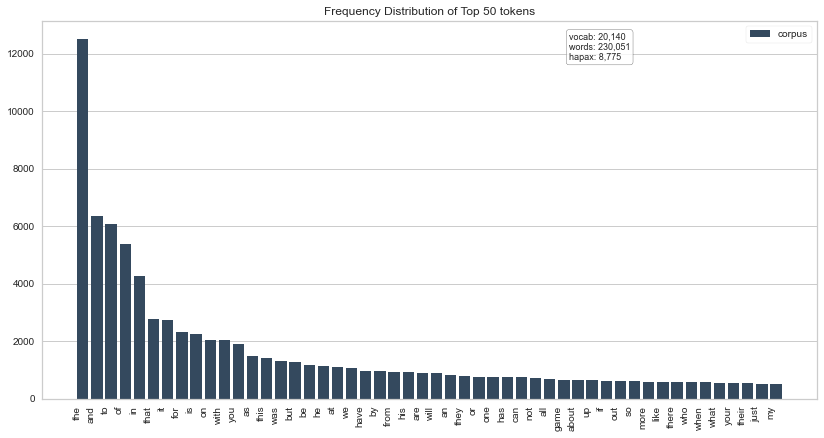

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, orient='v', size = (1000,500))
visualizer.fit(docs)
visualizer.show()

***
### t-SNE Corpus Visualization

One very popular method for visualizing document similarity is to use t-distributed stochastic neighbor embedding, t-SNE. Scikit-learn implements this decomposition method as the sklearn.manifold.TSNE transformer. 

By decomposing high-dimensional document vectors into 2 dimensions using probability distributions from both the original dimensionality and the decomposed dimensionality, t-SNE is able to effectively cluster similar documents. By decomposing to 2 or 3 dimensions, the documents can be visualized with a scatter plot.

Unfortunately, TSNE is very expensive, so typically a simpler decomposition method such as SVD or PCA is applied ahead of time. The TSNEVisualizer creates an inner transformer pipeline that applies such a decomposition first (SVD with 50 components by default), then performs the t-SNE embedding. 

The visualizer then plots the scatter plot, coloring by cluster or by class, or neither if a structural analysis is required.

In [29]:
#python -m pip install --upgrade scikit-learn
#python -m pip install --upgradethreadpoolctl
#python -m pip install --upgradenumpy

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus.data)
y = corpus.target

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

### UMAP Corpus Visualization

Uniform Manifold Approximation and Projection (UMAP) is a nonlinear dimensionality reduction method that is well suited to embedding in two or three dimensions for visualization as a scatter plot. UMAP is a relatively new technique but is very effective for visualizing clusters or groups of data points and their relative proximities. 

It does a good job of learning the local structure within your data but also attempts to preserve the relationships between your groups as can be seen in its exploration of MNIST. 

It is fast, scalable, and can be applied directly to sparse matrices, eliminating the need to run TruncatedSVD as a pre-processing step. Additionally, it supports a wide variety of distance measures allowing for easy exploration of your data. 

we represent documents via a term frequency inverse document frequency (TF-IDF) vector and then use UMAP to find a low dimensional representation of these documents. After that, the Yellowbrick visualizer plots the scatter plot, coloring by cluster or by class, or neither if a structural analysis is required.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.datasets import load_hobbies
from yellowbrick.text import UMAPVisualizer

tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(corpus.data)
labels = corpus.target

# Instantiate the text visualizer
umap = UMAPVisualizer()
umap.fit(docs, labels)
umap.show()

If we omit the target during fit, we can visualize the whole dataset to see if any meaningful patterns are observed.

In [ ]:
# Don't color points with their classes
umap = UMAPVisualizer(labels=["documents"], metric='cosine')
umap.fit(docs)
umap.show()

This means we don’t have to use class labels at all. Instead, we can use cluster membership from K-Means to label each document. This will allow us to look for clusters of related text by their contents:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.datasets import load_hobbies
from yellowbrick.text import UMAPVisualizer

tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(corpus.data)

# Instantiate the clustering model
clusters = KMeans(n_clusters=5)
clusters.fit(docs)

umap = UMAPVisualizer()
umap.fit(docs, ["c{}".format(c) for c in clusters.labels_])
umap.show()

On one hand, these clusters aren’t particularly well concentrated by the two-dimensional embedding of UMAP; while on the other hand, the true labels for this data are. That is a good indication that your data does indeed live on a manifold in your TF-IDF space and that structure is being ignored by the K-Means algorithm. 

Clustering can be quite tricky in high dimensional spaces and it is often a good idea to reduce your dimension before running clustering algorithms on your data.

### Dispersion Plot

A word’s importance can be weighed by its dispersion in a corpus. Lexical dispersion is a measure of a word’s homogeneity across the parts of a corpus.

Lexical dispersion illustrates the homogeneity of a word (or set of words) across the documents of a corpus. DispersionPlot allows for visualization of the lexical dispersion of words in a corpus. This plot illustrates with vertical lines the occurrences of one or more search terms throughout the corpus, noting how many words relative to the beginning of the corpus it appears.

In [ ]:
from yellowbrick.text import DispersionPlot
from yellowbrick.datasets import load_hobbies

# Create a list of words from the corpus text
text = [doc.split() for doc in corpus.data]

# Choose words whose occurence in the text will be plotted
target_words = ['Game', 'player', 'score', 'oil', 'Man']

# Create the visualizer and draw the plot
visualizer = DispersionPlot(target_words)
visualizer.fit(text)
visualizer.show()

If the target vector of the corpus documents is provided, the points will be colored with respect to their document category, which allows for additional analysis of relationships in search term homogeneity within and across document categories.

In [ ]:
from yellowbrick.text import DispersionPlot
from yellowbrick.datasets import load_hobbies

corpus = load_hobbies()
text = [doc.split() for doc in corpus.data]
y = corpus.target

target_words = ['points', 'money', 'score', 'win', 'reduce']

visualizer = DispersionPlot(
    target_words,
    colormap="Accent",
    title="Lexical Dispersion Plot, Broken Down by Class"
)
visualizer.fit(text, y)
visualizer.show()

### Word Correlation Plot

Word correlation illustrates the extent to which words or phrases co-appear across the documents in a corpus. This can be useful for understanding the relationships between known text features in a corpus with many documents. 

WordCorrelationPlot allows for the visualization of the document occurrence correlations between select words in a corpus. For a number of features n, the plot renders an n x n heatmap containing correlation values.

The correlation values are computed using the phi coefficient metric, which is a measure of the association between two binary variables. 

A value close to 1 or -1 indicates that the occurrences of the two features are highly positively or negatively correlated, while a value close to 0 indicates no relationship between the two features.

In [ ]:
from yellowbrick.datasets import load_hobbies
from yellowbrick.text.correlation import WordCorrelationPlot

# Create the list of words to plot
words = ["Tatsumi Kimishima", "Nintendo", "game", "play", "man", "woman"]

# Instantiate the visualizer and draw the plot
viz = WordCorrelationPlot(words)
viz.fit(corpus.data)
viz.show()

### PosTag Visualization

Parts of speech (e.g. verbs, nouns, prepositions, adjectives) indicate how a word is functioning within the context of a sentence. In English as in many other languages, a single word can function in multiple ways. 

Part-of-speech tagging lets us encode information not only about a word’s definition, but also its use in context (for example the words “ship” and “shop” can be either a verb or a noun, depending on the context).

The PosTagVisualizer is intended to support grammar-based feature extraction techniques for machine learning workflows that require natural language processing. 

The visualizer can either read in a corpus that has already been sentence- and word-segmented, and tagged, or perform this tagging automatically by specifying the parser to use (nltk or spacy). 

The visualizer creates a bar chart to visualize the relative proportions of different parts-of-speech in a corpus.

#### Penn Treebank Tags

In [ ]:
from yellowbrick.text import PosTagVisualizer


tagged_stanzas = [
    [
        [
            ('Whose', 'JJ'),('woods', 'NNS'),('these', 'DT'),
            ('are', 'VBP'),('I', 'PRP'),('think', 'VBP'),('I', 'PRP'),
            ('know', 'VBP'),('.', '.')
            ],
        [
            ('His', 'PRP$'),('house', 'NN'),('is', 'VBZ'),('in', 'IN'),
            ('the', 'DT'),('village', 'NN'),('though', 'IN'),(';', ':'),
            ('He', 'PRP'),('will', 'MD'),('not', 'RB'),('see', 'VB'),
            ('me', 'PRP'),('stopping', 'VBG'), ('here', 'RB'),('To', 'TO'),
            ('watch', 'VB'),('his', 'PRP$'),('woods', 'NNS'),('fill', 'VB'),
            ('up', 'RP'),('with', 'IN'),('snow', 'NNS'),('.', '.')
            ]
        ],
    [
        [
            ('My', 'PRP$'),('little', 'JJ'),('horse', 'NN'),('must', 'MD'),
            ('think', 'VB'),('it', 'PRP'),('queer', 'JJR'),('To', 'TO'),
            ('stop', 'VB'),('without', 'IN'),('a', 'DT'),('farmhouse', 'NN'),
            ('near', 'IN'),('Between', 'NNP'),('the', 'DT'),('woods', 'NNS'),
            ('and', 'CC'),('frozen', 'JJ'),('lake', 'VB'),('The', 'DT'),
            ('darkest', 'JJS'),('evening', 'NN'),('of', 'IN'),('the', 'DT'),
            ('year', 'NN'),('.', '.')
            ]
        ],
    [
        [
            ('He', 'PRP'),('gives', 'VBZ'),('his', 'PRP$'),('harness', 'NN'),
            ('bells', 'VBZ'),('a', 'DT'),('shake', 'NN'),('To', 'TO'),
            ('ask', 'VB'),('if', 'IN'),('there', 'EX'),('is', 'VBZ'),
            ('some', 'DT'),('mistake', 'NN'),('.', '.')
            ],
        [
            ('The', 'DT'),('only', 'JJ'),('other', 'JJ'),('sound', 'NN'),
            ('’', 'NNP'),('s', 'VBZ'),('the', 'DT'),('sweep', 'NN'),
            ('Of', 'IN'),('easy', 'JJ'),('wind', 'NN'),('and', 'CC'),
            ('downy', 'JJ'),('flake', 'NN'),('.', '.')
            ]
        ],
    [
        [
            ('The', 'DT'),('woods', 'NNS'),('are', 'VBP'),('lovely', 'RB'),
            (',', ','),('dark', 'JJ'),('and', 'CC'),('deep', 'JJ'),(',', ','),
            ('But', 'CC'),('I', 'PRP'),('have', 'VBP'),('promises', 'NNS'),
            ('to', 'TO'),('keep', 'VB'),(',', ','),('And', 'CC'),('miles', 'NNS'),
            ('to', 'TO'),('go', 'VB'),('before', 'IN'),('I', 'PRP'),
            ('sleep', 'VBP'),(',', ','),('And', 'CC'),('miles', 'NNS'),
            ('to', 'TO'),('go', 'VB'),('before', 'IN'),('I', 'PRP'),
            ('sleep', 'VBP'),('.', '.')
            ]
    ]
]

# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer()
viz.fit(tagged_stanzas)
viz.show()

#### Universal Dependencies Tags
Libraries like SpaCy use tags from the Universal Dependencies (UD) framework. 

The PosTagVisualizer can also be used with text tagged using this framework by specifying the tagset keyword as “universal” on instantiation.

In [ ]:
tagged_speech = [
    [
        [
            ('In', 'ADP'),('all', 'DET'),('honesty', 'NOUN'),(',', 'PUNCT'),
            ('I', 'PRON'),('said', 'VERB'),('yes', 'INTJ'),('to', 'ADP'),
            ('the', 'DET'),('fear', 'NOUN'),('of', 'ADP'),('being', 'VERB'),
            ('on', 'ADP'),('this', 'DET'),('stage', 'NOUN'),('tonight', 'NOUN'),
            ('because', 'ADP'),('I', 'PRON'),('wanted', 'VERB'),('to', 'PART'),
            ('be', 'VERB'),('here', 'ADV'),(',', 'PUNCT'),('to', 'PART'),
            ('look', 'VERB'),('out', 'PART'),('into', 'ADP'),('this', 'DET'),
            ('audience', 'NOUN'),(',', 'PUNCT'),('and', 'CCONJ'),
            ('witness', 'VERB'),('this', 'DET'),('moment', 'NOUN'),('of', 'ADP'),
            ('change', 'NOUN')
            ],
        [
            ('and', 'CCONJ'),('I', 'PRON'),("'m", 'VERB'),('not', 'ADV'),
            ('fooling', 'VERB'),('myself', 'PRON'),('.', 'PUNCT')
            ],
        [
            ('I', 'PRON'),("'m", 'VERB'),('not', 'ADV'),('fooling', 'VERB'),
            ('myself', 'PRON'),('.', 'PUNCT')
            ],
        [
            ('Next', 'ADJ'),('year', 'NOUN'),('could', 'VERB'),('be', 'VERB'),
            ('different', 'ADJ'),('.', 'PUNCT')
            ],
        [
            ('It', 'PRON'),('probably', 'ADV'),('will', 'VERB'),('be', 'VERB'),
            (',', 'PUNCT'),('but', 'CCONJ'),('right', 'ADV'),('now', 'ADV'),
            ('this', 'DET'),('moment', 'NOUN'),('is', 'VERB'),('real', 'ADJ'),
            ('.', 'PUNCT')
            ],
        [
            ('Trust', 'VERB'),('me', 'PRON'),(',', 'PUNCT'),('it', 'PRON'),
            ('is', 'VERB'),('real', 'ADJ'),('because', 'ADP'),('I', 'PRON'),
            ('see', 'VERB'),('you', 'PRON')
            ],
        [
            ('and', 'CCONJ'), ('I', 'PRON'), ('see', 'VERB'), ('you', 'PRON')
            ],
        [
            ('—', 'PUNCT')
            ],
        [
            ('all', 'ADJ'),('these', 'DET'),('faces', 'NOUN'),('of', 'ADP'),
            ('change', 'NOUN')
            ],
        [
            ('—', 'PUNCT'),('and', 'CCONJ'),('now', 'ADV'),('so', 'ADV'),
            ('will', 'VERB'),('everyone', 'NOUN'),('else', 'ADV'), ('.', 'PUNCT')
            ]
    ]
]

# Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(tagset="universal")
viz.fit(tagged_speech)
viz.show()

#### Part of Speech Tags

In [ ]:
p_o_s = pd.read_csv("part_of_speech_tags")

In [ ]:
p_o_s.shape

In [ ]:
p_o_s.head()